In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('dataset.csv',)
df.rename(columns={'Ano/Estados':'Ano'},inplace=True)

display(df)

,Ano,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


C:\Users\Vinicius\AppData\Local\Temp\ipykernel_14364\2105484763.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(barra_cores, label='Escala de Cores', orientation='vertical')


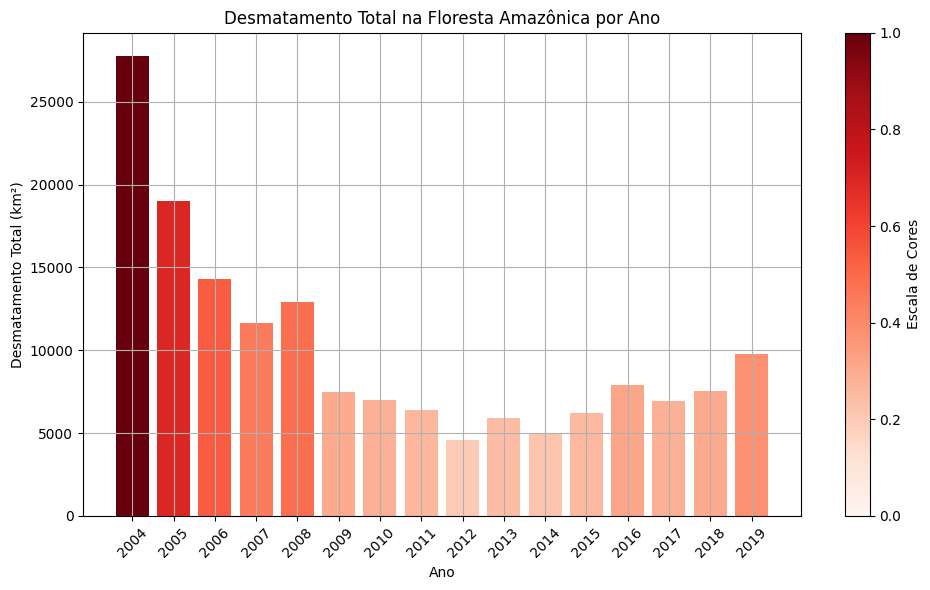

In [61]:
cores = plt.cm.Reds(np.interp(df['AMZ LEGAL'], (df['AMZ LEGAL'].min(), df['AMZ LEGAL'].max()), (0.2, 1)))

plt.figure(figsize=(10, 6))
barras = plt.bar(df['Ano'], df['AMZ LEGAL'], color=cores)
plt.xlabel('Ano')
plt.ylabel('Desmatamento Total (km²)')
plt.title('Desmatamento Total na Floresta Amazônica por Ano')

barra_cores = plt.cm.ScalarMappable(cmap='Reds')
barra_cores.set_array([])  
plt.colorbar(barra_cores, label='Escala de Cores', orientation='vertical')

plt.xticks(df['Ano'], rotation=45)
plt.tight_layout()
plt.grid(True)

plt.show()

In [66]:
estados = ["AC" ,"AM" ,"AP" ,"MA" ,"MT" ,"PA" ,"RO" ,"RR" ,"TO"]
valorTotal = {}

for estado in estados:
    valorTotal[estado] = df[estado].sum()

for valor in valorTotal.items():
    print(valor)

valorTotal = dict(sorted(valorTotal.items(), key=lambda item: item[1]))

('AC', 5722)
('AM', 12425)
('AP', 616)
('MA', 8318)
('MT', 43065)
('PA', 62778)
('RO', 22279)
('RR', 3891)
('TO', 1241)


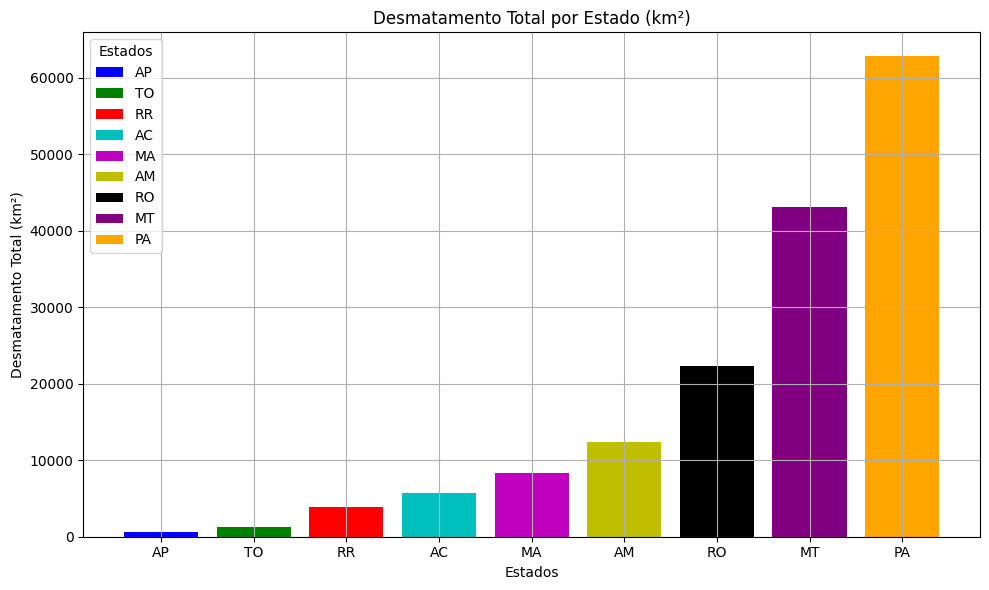

In [67]:
cores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']

rotulos_legenda = list(valorTotal.keys())

plt.figure(figsize=(10, 6))
barras = plt.bar(valorTotal.keys(), valorTotal.values(), color=cores)
plt.xlabel('Estados')
plt.ylabel('Desmatamento Total (km²)')
plt.title('Desmatamento Total por Estado (km²)')

plt.legend(barras, rotulos_legenda, title='Estados')
plt.grid(True)
plt.tight_layout()

plt.show()

In [64]:
estado_resultado = []
ano_resultado = []

# Implementação de novo dataframe apenas com o ano em que cada estado mais desmatou 
for estado in estados:
    filtro_estado = df[df[estado] == df[estado].max()]
    if not filtro_estado.empty:
        ano_mais_desmatou = filtro_estado.iloc[0]['Ano']
        estado_resultado.append(estado)
        ano_resultado.append(ano_mais_desmatou)

resultado = pd.DataFrame({'Estado': estado_resultado, 'Maior Desmatamento': ano_resultado})

# Conversão de siglas para nomes dos estados
dic = {
    'AC': 'Acre',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'PA': 'Pará',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'TO': 'Tocantins'
}

novo_resultado = resultado.replace({'Estado': dic})

display(novo_resultado)

,Estado,Maior Desmatamento
0,Acre,2004
1,Amazonas,2019
2,Amapá,2008
3,Maranhão,2008
4,Mato Grosso,2004
5,Pará,2004
6,Rondônia,2004
7,Roraima,2019
8,Tocantins,2005
